In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt, time, timedelta
import glob
import random
import seaborn as sns
from pathlib import Path
Path.cwd()

%matplotlib inline

## Boston dataset - uber prices and weather

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [4]:
cab_rides = pd.read_csv("datasets/archive/cab_rides.csv")
weather = pd.read_csv("datasets/archive/weather.csv")

In [5]:
cab_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [8]:
weather.loc[weather['location']=='Back Bay']

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
11,43.28,Back Bay,0.81,990.81,0.0000,1543347920,0.71,8.30
25,39.23,Back Bay,0.83,996.09,0.0000,1543449727,0.66,10.67
36,27.27,Back Bay,0.15,1033.40,0.0000,1544787901,0.80,2.96
47,45.49,Back Bay,1.00,1012.46,0.0000,1543253710,0.86,6.47
...,...,...,...,...,...,...,...,...
6203,50.60,Back Bay,1.00,1002.87,0.0000,1543791174,0.92,3.99
6221,29.91,Back Bay,0.04,1016.53,0.0000,1543578774,0.84,3.17
6232,32.81,Back Bay,0.88,1020.17,0.0000,1543657974,0.79,4.19
6251,39.50,Back Bay,1.00,1018.07,0.0301,1543751574,0.92,5.38


In [6]:
cab_rides.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [7]:
cab_rides = cab_rides.dropna(axis=0).reset_index(drop=True)

In [8]:
weather.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [9]:
weather = weather.fillna(0)

In [10]:
avg_weather_df = weather.groupby('location').mean().reset_index(drop=False)
avg_weather_df = avg_weather_df.drop('time_stamp',axis=1)
avg_weather_df

,location,temp,clouds,pressure,rain,humidity,wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [11]:
# Creating a df for source and destination
# Merge with rides data
src_weather = avg_weather_df.rename(
    columns={
        'location':'source',
        'temp':'src_temp',
        'clouds':'src_cloud',
        'pressure':'src_pressure',
        'rain':'src_rain',
        'humidity':'src_humidity',
        'wind':'src_wind'
    }
)

dst_weather = avg_weather_df.rename(
    columns={
        'location':'destination',
        'temp':'dst_temp',
        'clouds':'dst_cloud',
        'pressure':'dst_pressure',
        'rain':'dst_rain',
        'humidity':'dst_humidity',
        'wind':'dst_wind'
    }
)

In [13]:
dataset = cab_rides.merge(src_weather,on='source').merge(dst_weather,on='destination')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 637975
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          637976 non-null  float64
 1   cab_type          637976 non-null  object 
 2   time_stamp        637976 non-null  int64  
 3   destination       637976 non-null  object 
 4   source            637976 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  637976 non-null  float64
 7   id                637976 non-null  object 
 8   product_id        637976 non-null  object 
 9   name              637976 non-null  object 
 10  src_temp          637976 non-null  float64
 11  src_cloud         637976 non-null  float64
 12  src_pressure      637976 non-null  float64
 13  src_rain          637976 non-null  float64
 14  src_humidity      637976 non-null  float64
 15  src_wind          637976 non-null  float64
 16  dst_temp          63

In [14]:
timestamps = [dt.fromtimestamp(x) for x in dataset['time_stamp']/1000]

In [15]:
print(timestamps[10000])

2018-12-01 13:08:01.962000


In [17]:
timestamps_weather = [dt.fromtimestamp(x) for x in weather['time_stamp']]
print(timestamps_weather[0])

2018-12-16 18:45:01


<AxesSubplot:>

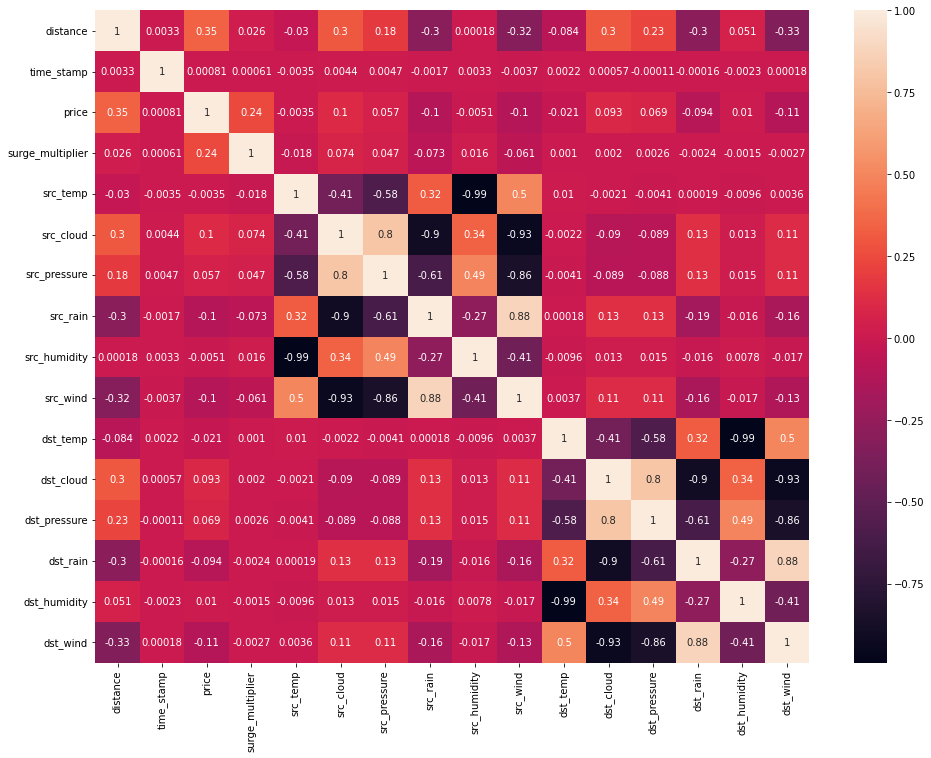

In [18]:
# Correlation matrix
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(dataset.corr(),annot=True)

In [19]:
# One hot encode
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

def preprocess_inputs(df,val_on = True):
    df = df.copy()
    
    # Drop id column
    df = df.drop('id', axis=1)
    
    # Binary encode cab_type column
    df['cab_type'] = df['cab_type'].replace({'Lyft': 0, 'Uber': 1})
    
    # One-hot encode remaining categorical columns
    for column, prefix in [('destination', "dst"), ('source', "src"), ('product_id', "pid"), ('name', "nm")]:
        df = onehot_encode(df, column=column, prefix=prefix)
    
    # Split df into X and y
    y = df['price']
    X = df.drop('price', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)
    
    if val_on:
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.75, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    if val_on:
        X_val = pd.DataFrame(scaler.transform(X_val), columns=X.columns)
    
    return (X_train, X_test, X_val, y_train, y_test, y_val) if val_on else (X_train, X_test, y_train, y_test)


In [20]:
val_on = False # Validation dataset off
if val_on:
    X_train, X_test, X_val, y_train, y_test, y_val = preprocess_inputs(dataset, val_on=val_on)
else:
    X_train, X_test, y_train, y_test = preprocess_inputs(dataset, val_on=val_on)

In [21]:
X_train

,distance,cab_type,time_stamp,surge_multiplier,src_temp,src_cloud,src_pressure,src_rain,src_humidity,src_wind,...,nm_Lux,nm_Lux Black,nm_Lux Black XL,nm_Lyft,nm_Lyft XL,nm_Shared,nm_UberPool,nm_UberX,nm_UberXL,nm_WAV
0,-1.382973,-1.036697,1.036534,-0.157999,-0.715281,-0.013929,-0.073957,0.401574,0.955038,0.574632,...,-0.296246,-0.296015,-0.295518,3.383712,-0.294839,-0.29513,-0.307586,-0.307589,-0.307410,-0.307020
1,-0.096149,-1.036697,0.997798,-0.157999,-0.382074,-0.794371,-0.387312,0.912459,0.374120,0.601198,...,-0.296246,-0.296015,3.383892,-0.295533,-0.294839,-0.29513,-0.307586,-0.307589,-0.307410,-0.307020
2,0.168266,-1.036697,-0.330781,-0.157999,-0.300018,0.025093,0.512421,0.176913,0.256121,0.136292,...,-0.296246,-0.296015,-0.295518,3.383712,-0.294839,-0.29513,-0.307586,-0.307589,-0.307410,-0.307020
3,-0.862955,0.964602,-1.141809,-0.157999,2.192213,-1.067526,-1.525940,0.733769,-2.167396,1.044781,...,-0.296246,-0.296015,-0.295518,-0.295533,-0.294839,-0.29513,3.251128,-0.307589,-0.307410,-0.307020
4,-0.298868,0.964602,1.312036,-0.157999,-0.158713,-1.087037,0.006709,0.935245,0.206199,0.737174,...,-0.296246,-0.296015,-0.295518,-0.295533,-0.294839,-0.29513,-0.307586,-0.307589,-0.307410,3.257112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510375,0.979142,0.964602,-0.440894,-0.157999,2.192213,-1.067526,-1.525940,0.733769,-2.167396,1.044781,...,-0.296246,-0.296015,-0.295518,-0.295533,-0.294839,-0.29513,-0.307586,3.251087,-0.307410,-0.307020
510376,0.802864,-1.036697,0.932937,-0.157999,-0.382074,-0.794371,-0.387312,0.912459,0.374120,0.601198,...,-0.296246,3.378205,-0.295518,-0.295533,-0.294839,-0.29513,-0.307586,-0.307589,-0.307410,-0.307020
510377,2.019177,0.964602,-0.515323,-0.157999,2.192213,-1.067526,-1.525940,0.733769,-2.167396,1.044781,...,-0.296246,-0.296015,-0.295518,-0.295533,-0.294839,-0.29513,-0.307586,-0.307589,-0.307410,3.257112
510378,0.723540,0.964602,0.992998,-0.157999,-0.382074,-0.794371,-0.387312,0.912459,0.374120,0.601198,...,-0.296246,-0.296015,-0.295518,-0.295533,-0.294839,-0.29513,-0.307586,-0.307589,3.252985,-0.307020


In [22]:
X_test

,distance,cab_type,time_stamp,surge_multiplier,src_temp,src_cloud,src_pressure,src_rain,src_humidity,src_wind,...,nm_Lux,nm_Lux Black,nm_Lux Black XL,nm_Lyft,nm_Lyft XL,nm_Shared,nm_UberPool,nm_UberX,nm_UberXL,nm_WAV
0,-0.827700,-1.036697,0.923363,-0.157999,-0.300018,0.025093,0.512421,0.176913,0.256121,0.136292,...,-0.296246,-0.296015,3.383892,-0.295533,-0.294839,-0.295130,-0.307586,-0.307589,-0.30741,-0.30702
1,0.115383,-1.036697,1.315960,-0.157999,-0.300018,0.025093,0.512421,0.176913,0.256121,0.136292,...,3.375571,-0.296015,-0.295518,-0.295533,-0.294839,-0.295130,-0.307586,-0.307589,-0.30741,-0.30702
2,0.370985,0.964602,1.270266,-0.157999,-0.794978,0.551891,-0.167032,-1.787477,0.873346,-0.977035,...,-0.296246,-0.296015,-0.295518,-0.295533,-0.294839,-0.295130,-0.307586,3.251087,-0.30741,-0.30702
3,1.014397,-1.036697,1.146205,-0.157999,-0.382074,-0.794371,-0.387312,0.912459,0.374120,0.601198,...,-0.296246,-0.296015,-0.295518,-0.295533,-0.294839,3.388342,-0.307586,-0.307589,-0.30741,-0.30702
4,-1.585692,-1.036697,-0.264621,-0.157999,2.192213,-1.067526,-1.525940,0.733769,-2.167396,1.044781,...,-0.296246,-0.296015,-0.295518,-0.295533,-0.294839,3.388342,-0.307586,-0.307589,-0.30741,-0.30702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127591,-0.721933,-1.036697,-0.827832,-0.157999,-0.061190,0.668958,0.425550,-0.600609,0.024662,-0.445015,...,-0.296246,-0.296015,-0.295518,3.383712,-0.294839,-0.295130,-0.307586,-0.307589,-0.30741,-0.30702
127592,0.415055,0.964602,-1.026014,-0.157999,-0.715281,-0.013929,-0.073957,0.401574,0.955038,0.574632,...,-0.296246,-0.296015,-0.295518,-0.295533,-0.294839,-0.295130,-0.307586,3.251087,-0.30741,-0.30702
127593,0.185894,-1.036697,1.074826,-0.157999,-0.300018,0.025093,0.512421,0.176913,0.256121,0.136292,...,-0.296246,-0.296015,-0.295518,-0.295533,-0.294839,3.388342,-0.307586,-0.307589,-0.30741,-0.30702
127594,-0.862955,0.964602,1.218896,-0.157999,2.192213,-1.067526,-1.525940,0.733769,-2.167396,1.044781,...,-0.296246,-0.296015,-0.295518,-0.295533,-0.294839,-0.295130,-0.307586,-0.307589,-0.30741,-0.30702


In [23]:
y_test

606015    27.5
503810    16.5
207240    10.5
331602     7.0
584694     7.0
          ... 
531981     7.0
458598     9.5
554570     7.0
420872    27.5
455529    32.5
Name: price, Length: 127596, dtype: float64

In [24]:
y_train

564759     7.0
547094    27.5
447791     9.0
417124    14.0
215864    11.5
          ... 
371403    10.5
491263    27.5
470924    18.5
491755    16.5
128037    23.0
Name: price, Length: 510380, dtype: float64

In [25]:
y_test.isna().sum()

0

In [26]:
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import RocCurveDisplay

model = LinearRegression()
model.fit(X_train, y_train)
print("Test R^2 Score: {:.5f}".format(model.score(X_test, y_test)))

# model_disp = RocCurveDisplay.from_estimator(model,X_test,y_test) # from_predictions(model,X_test,y_test)

Test R^2 Score: 0.92801


In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(hidden_layer_sizes=(132,64), max_iter=3, activation='relu',solver='adam',random_state=1,learning_rate_init=0.0001)
clf.fit(X_train,y_train)

print("Test R^2 Score: {:.5f}".format(clf.score(X_test, y_test)))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Test R^2 Score: 0.96453


In [28]:
import pickle

In [29]:
pickle.dump(clf, open('boston_rideshare_model_sk.sav', 'wb'))

In [31]:
loaded_model = pickle.load(open('boston_rideshare_model_sk.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9645255198392252


In [30]:
y_pred_lin = model.predict(X_test)
y_pred_mlp = clf.predict(X_test)
print(y_pred_lin, y_pred_mlp)

[28.6843344  16.99243986 10.23218596 ...  6.14991057 27.7558676
 36.03760588] [26.10552755 16.99881992 10.58558244 ...  6.38194294 27.04508748
 35.82484885]


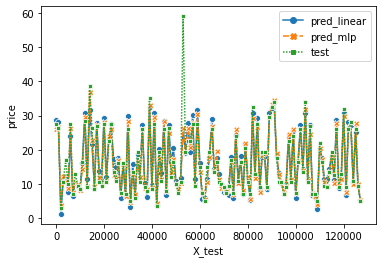

In [32]:
pred_test_data = pd.DataFrame()
pred_test_data['pred_linear'] = y_pred_lin
pred_test_data['pred_mlp'] = y_pred_mlp
pred_test_data['test'] = y_test.to_numpy()
pred_test_data = pred_test_data.dropna(axis=0).reset_index(drop=True)
ax = sns.lineplot(data=pred_test_data[::1000][['pred_linear','pred_mlp','test']], markers= True)
ax.set(xlabel='X_test', ylabel='price', title='')
ax.legend(ncol=1)

# Pytorch based regression

In [33]:
import numpy as np
import random
from collections import namedtuple,deque

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [34]:
class DNN(nn.Module):
    """ DNN - Function Approximator"""
    def __init__(self, input_size,output_size=1, seed=42, h1=132, h2=64, p=0):
        """
        Initialize parameters and build model.
        Params
        =======
            input_size (int): Dimension of input
            output_size (int): Dimension of output
            seed (int): Random seed
            h1 (int): Number of nodes in first hidden layer
            h2 (int): Number of nodes in second hidden layer
        """
        super(DNN,self).__init__() ## calls __init__ method of nn.Module class
        self.seed = torch.manual_seed(seed)
        self.fc1= nn.Linear(input_size,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,output_size)
        self.dropout = nn.Dropout(p)
        
    def forward(self,x):
        # x = state
        """
        Build a network that maps input features -> output.
        """
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        return self.fc3(x)


# determine the supported device
def get_device():
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu') # don't have GPU 
    return device

# convert a df to tensor to be used in pytorch
def df_to_tensor(df):
    device = get_device()
    return torch.from_numpy(df.values).float().to(device)


class MyDataset(torch.utils.data.Dataset):
  '''
  Prepare the ride price dataset for regression
  '''

  def __init__(self, X, y, scale_data=True):
    if not torch.is_tensor(X) and not torch.is_tensor(y):
      # Apply scaling if necessary
      if scale_data:
          X = StandardScaler().fit_transform(X)
      self.X = df_to_tensor(X) #torch.from_numpy(X)
      self.y = df_to_tensor(y) #torch.from_numpy(y)

  def __len__(self):
      return len(self.X)

  def __getitem__(self, i):
      return self.X[i], self.y[i]    
    
    
BUFFER_SIZE = int(1e5)  #replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
ALPHA = 5e-4               # learning rate
UPDATE = 4        # how often to update the network

device = get_device()  #torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

train_data = MyDataset(X_train,y_train,scale_data=False)
test_data = MyDataset(X_test,y_test,scale_data=False)
#val_data = MyDataset(X_val,y_val,scale_data=False)

cpu


In [35]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 128 # 1000
learning_rate = 0.0001
momentum = 0.5
keep_prob = 1
#log_interval = 10
weight_list = [-2.0, -1.0, -0.5, 0.5, 1.0, 2.0] # WANN shared weight list

random_seed = 42
torch.backends.cudnn.enabled = False


In [36]:
# Initialize the DNN
dnn = DNN(input_size=len(X_train.columns),output_size=1,seed=random_seed, p=1-keep_prob)

# Define 
criterion = nn.MSELoss()#nn.L1Loss()
optimizer = torch.optim.Adam(params=dnn.parameters(),lr=learning_rate)

In [37]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size_train, shuffle=True, num_workers=1)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size_test, shuffle=True, num_workers=1)
#valloader = torch.utils.data.DataLoader(val_data, batch_size=10, shuffle=True, num_workers=1)

In [38]:
print('Training the Deep Learning network ...')
train_loss = []
train_accuracy = []


total_batch = len(trainloader.dataset) // batch_size_train

print('Size of the training dataset is {}'.format(len(trainloader.dataset)))
print('Size of the testing dataset is {}'.format(len(testloader.dataset)))
print('Batch size is : {}'.format(batch_size_train))
print('Total number of batches is : {0:2.0f}'.format(total_batch))
print('\nTotal number of epochs is : {0:2.0f}'.format(n_epochs))

# Run the training loop
for epoch in range(n_epochs): # 5 epochs at maximum
    # Print epoch
    print(f'Starting epoch {epoch+1}')
    # Set current loss value
    avg_loss = 0.0
    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):
        # Get and prepare inputs
        inputs, target = data
        inputs, target = inputs.float(), target.float()
        target = target.reshape((target.shape[0], 1))
        # Zero the gradients
        optimizer.zero_grad()
        # Perform forward pass
        output = dnn(inputs)
        # Compute loss
        loss = criterion(output, target)

        # Perform backward pass
        loss.backward()

        # Perform optimization
        optimizer.step()

        train_loss.append(loss.item())   
        if i % 200 == 0:
            print('Loss after mini-batch %5d: %.3f' %
                (i + 1, loss.item() ))
        avg_loss += loss.data / total_batch
        
    print("[Epoch: {:>4}], averaged loss = {:>.9}".format(epoch + 1, avg_loss.item()))
    # Process is complete.
print('Training process has finished.')

Training the Deep Learning network ...
Size of the training dataset is 510380
Size of the testing dataset is 127596
Batch size is : 64
Total number of batches is : 7974

Total number of epochs is :  3
Starting epoch 1
Loss after mini-batch     1: 304.064
Loss after mini-batch   201: 199.428
Loss after mini-batch   401: 39.184
Loss after mini-batch   601: 8.468
Loss after mini-batch   801: 7.156
Loss after mini-batch  1001: 2.749
Loss after mini-batch  1201: 4.840
Loss after mini-batch  1401: 4.078
Loss after mini-batch  1601: 2.739
Loss after mini-batch  1801: 3.529
Loss after mini-batch  2001: 3.544
Loss after mini-batch  2201: 2.663
Loss after mini-batch  2401: 3.564
Loss after mini-batch  2601: 3.269
Loss after mini-batch  2801: 2.419
Loss after mini-batch  3001: 3.008
Loss after mini-batch  3201: 2.699
Loss after mini-batch  3401: 2.857
Loss after mini-batch  3601: 2.816
Loss after mini-batch  3801: 4.517
Loss after mini-batch  4001: 2.926
Loss after mini-batch  4201: 4.334
Loss af

<function matplotlib.pyplot.show(close=None, block=None)>

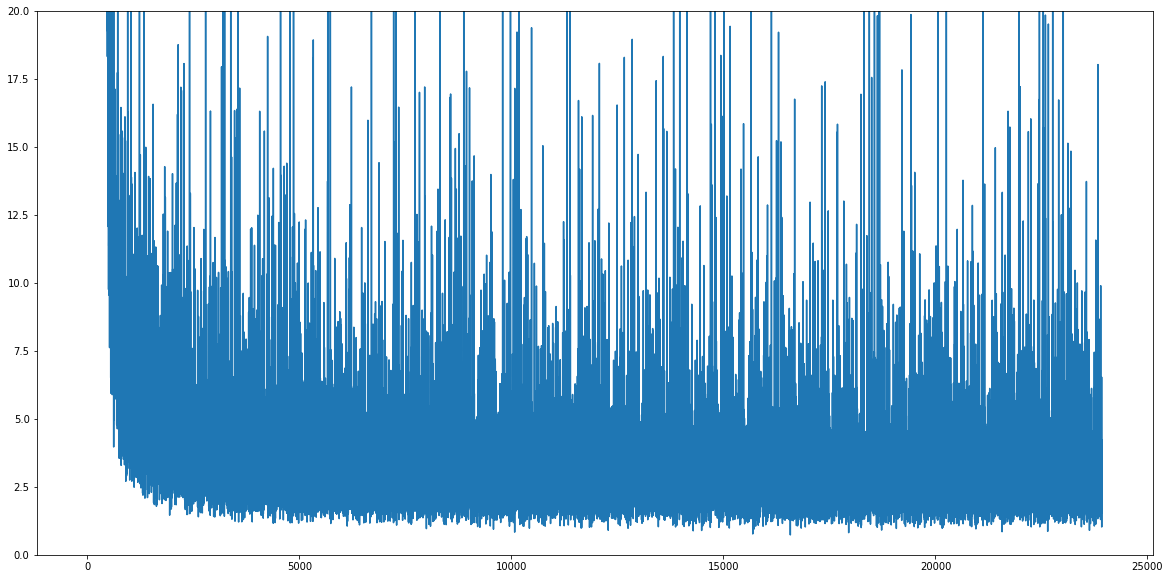

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(np.arange(len(train_loss)), train_loss), plt.ylim([0,20])
plt.show

In [40]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

avg_train_loss = moving_average(np.array(train_loss),20)

<function matplotlib.pyplot.show(close=None, block=None)>

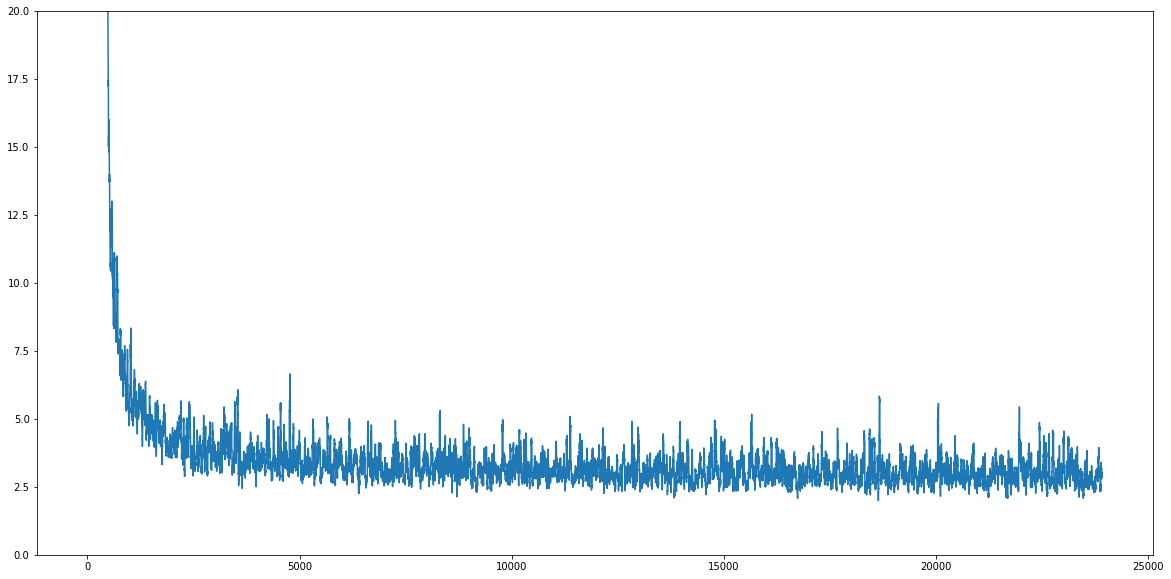

In [41]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(len(avg_train_loss)), avg_train_loss), plt.ylim([0,20])
plt.show

In [42]:
### classification ###
# def test_DNN(agent):
    
test_loss = 0
results = np.array([])
targets = np.array([])
dnn = dnn.eval()

correct = 0
for j, data in enumerate(testloader):
    # Get and prepare inputs
    inputs, target = data
    inputs, target = inputs.float(), target.float()
    target = target.reshape((target.shape[0], 1))
    target = target.cpu().detach().numpy()
    targets = np.append(targets,target)

    # Perform forward pass
    output = dnn(inputs)
    output = output.cpu().detach().numpy()
    results = np.append(results,output)
results = results.reshape(-1)
targets = targets.reshape(-1)

In [43]:
## Regression - R2 score
from sklearn.metrics import r2_score
#This is a little bit tricky to get the resulting prediction.  
def calculate_r2_org(x,y=[]):
    """
    This function will return the r2 if passed x and y or return predictions if just passed x. 
    """
    # Evaluate the model with the test set. 
    X = Variable(torch.FloatTensor(x))  
    result = DNN(X) #This outputs the value for regression
    result=result.data[:,0].numpy()
  
    if len(y) != 0:
        r2=r2_score(result, y)
        print("R-Squared", r2)
        #print('Accuracy {:.2f}'.format(num_right / len(y)), "for a total of ", len(y), "records")
        return pd.DataFrame(data= {'actual': y, 'predicted': result})
    else:
        print("returning predictions")
        return result

def calculate_r2(y,y_pred):
    """
    This function will return the r2 if passed x and y or return predictions if just passed x. 
    """
  
    if len(y) != 0 and len(y)==len(y_pred):
        r2=r2_score(y_pred, y)
        print("R-Squared", r2)
        #print('Accuracy {:.2f}'.format(num_right / len(y)), "for a total of ", len(y), "records")
        return pd.DataFrame(data= {'actual': y, 'predicted': y_pred})
    else:
        print("returning predictions")
        return result

In [44]:
test_score = calculate_r2(y=targets,y_pred=results)

R-Squared 0.9636336661429825


In [45]:
test_score


,actual,predicted
0,16.5,15.671739
1,15.0,16.165792
2,30.0,31.179998
3,29.5,26.660307
4,5.0,4.218067
...,...,...
127591,16.5,18.060600
127592,38.5,33.038113
127593,26.5,26.830729
127594,19.5,18.258101


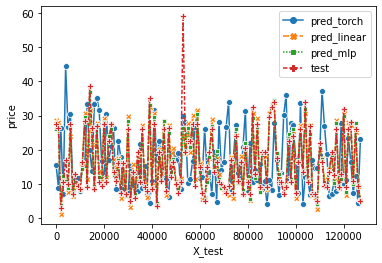

In [46]:
pred_test_data = pd.DataFrame()
pred_test_data['pred_torch'] = results
pred_test_data['pred_linear'] = y_pred_lin
pred_test_data['pred_mlp'] = y_pred_mlp
pred_test_data['test'] = targets
pred_test_data['test'] = y_test.to_numpy()
pred_test_data = pred_test_data.dropna(axis=0).reset_index(drop=True)
ax = sns.lineplot(data=pred_test_data[::1000][['pred_torch','pred_linear','pred_mlp','test']], markers= True)
ax.set(xlabel='X_test', ylabel='price', title='')
ax.legend(ncol=1)

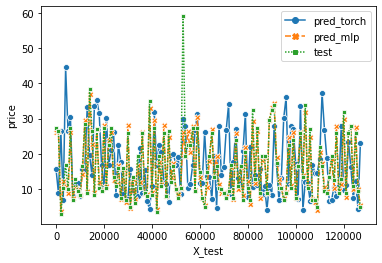

In [47]:
pred_test_data = pd.DataFrame()
pred_test_data['pred_torch'] = results
pred_test_data['pred_mlp'] = y_pred_mlp
pred_test_data['test'] = targets
pred_test_data['test'] = y_test.to_numpy()
pred_test_data = pred_test_data.dropna(axis=0).reset_index(drop=True)
ax = sns.lineplot(data=pred_test_data[::1000][['pred_torch','pred_mlp','test']], markers= True)
ax.set(xlabel='X_test', ylabel='price', title='')
ax.legend(ncol=1)

Sci-kit learn's MLP Regressor has best performance followed by Pytorch's custom NN. Linear Regressor pewrforms lower than both.